
# Exploring Student Data
Imagine that you work for a school district and have collected some data on local students and their parents. You’ve been tasked with answering some important questions:

- How are students performing in their math classes?
- What do students’ parents do for work?
- How often are students absent from school?
In this project, you’ll explore and summarize some student data in order to answer these questions.

## Data
The provided dataframe (saved as students) includes the following variables/features:

- `address`: the location of the student’s home ('U' for urban and 'R' for rural)
- `absences`: the number of times the student was absent during the school year
- `Mjob`: the student’s mother’s job industry
- `Fjob`: the student’s father’s job industry
- `math_grade`: the student’s final grade in math, ranging from 0 to 20

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

In [2]:
students_df = pd.read_csv('students.csv')
students_df.head()

,address,absences,Mjob,Fjob,math_grade
0,U,6,at_home,teacher,6
1,U,4,at_home,other,6
2,U,10,at_home,other,10
3,U,2,health,services,15
4,U,4,other,other,10


In [3]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   address     395 non-null    object
 1   absences    395 non-null    int64 
 2   Mjob        395 non-null    object
 3   Fjob        395 non-null    object
 4   math_grade  395 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 15.6+ KB


In [4]:
students_df.describe(include='all')

,address,absences,Mjob,Fjob,math_grade
count,395,395.000000,395,395,395.000000
unique,2,NaN,5,5,NaN
top,U,NaN,other,other,NaN
freq,307,NaN,141,217,NaN
mean,NaN,5.708861,NaN,NaN,10.415190
std,NaN,8.003096,NaN,NaN,4.581443
min,NaN,0.000000,NaN,NaN,0.000000
25%,NaN,0.000000,NaN,NaN,8.000000
50%,NaN,4.000000,NaN,NaN,11.000000
75%,NaN,8.000000,NaN,NaN,14.000000


#### Do more students live in urban or rural locations? 

Answer: Most students live in urban locations (307/395)

## Summarize a typical student grade

In [5]:
print('mean: ', students_df.math_grade.mean())
print('median: ', students_df.math_grade.median())
print('mode: ', students_df.math_grade.mode())

mean:  10.415189873417722
median:  11.0
mode:  0    10
Name: math_grade, dtype: int64


#### What is the most common grade earned by students in this dataset? How different is this number from the mean and median?

The most common grade obtained by the students is 10. There isn't much difference between mean, median and mode values which indicates that the variation is not large and the data's distribution is not skewed.

## Summarize the spread of student grades

In [6]:
print('range: ', students_df.math_grade.max() - students_df.math_grade.min())
print('std: ', students_df.math_grade.std())
print('mean absolute deviation: ', students_df.math_grade.mad())

range:  20
std:  4.5814426109978434
mean absolute deviation:  3.4289889440794745


/tmp/ipykernel_21424/2168137937.py:3: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('mean absolute deviation: ', students_df.math_grade.mad())


#### About two thirds of values fall within one standard deviation of the mean. What does this number tell you about how much math grades vary?

This tells me that the math grades do not vary that much from the mean value.

## Visualize the distribution of student grades

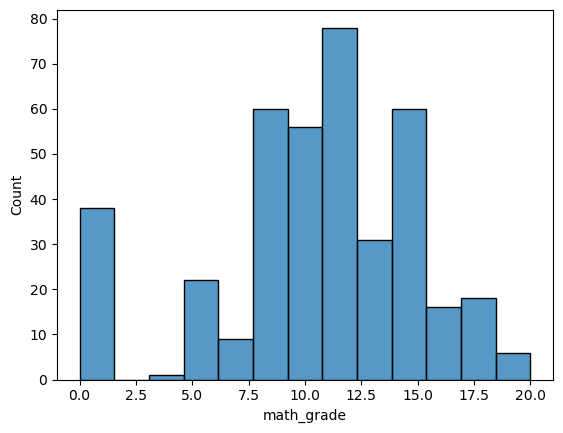

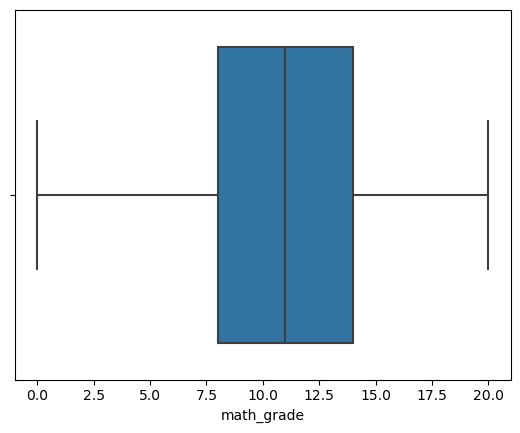

In [7]:
sns.histplot(x='math_grade', data=students_df)
plt.show()
plt.clf()

sns.boxplot(x='math_grade', data=students_df)
plt.show()
plt.close()

## Summarize mothers' jobs

In [8]:
print(students_df.Mjob.value_counts())
print('--------------------')
print(students_df.Mjob.value_counts(normalize=True))

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
--------------------
other       0.356962
services    0.260759
at_home     0.149367
teacher     0.146835
health      0.086076
Name: Mjob, dtype: float64


#### Which value of Mjob is most common?
Answer: The value `other` is the most common.
#### What proportion of students have mothers who work in health?
Answer: 8.6% of the students have mothers who work in health

## Visualize the distribution of mothers' jobs

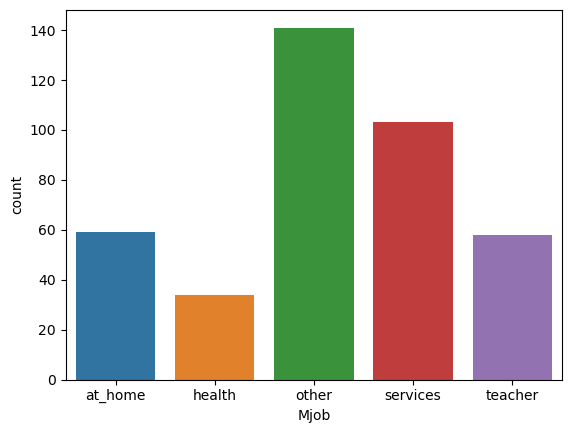

In [9]:
sns.countplot(x='Mjob', data=students_df)
plt.show()
plt.close()

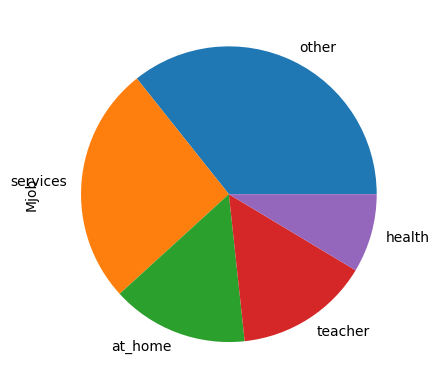

In [10]:
students_df.Mjob.value_counts().plot.pie()
plt.show()
plt.close()

## Students' Absences

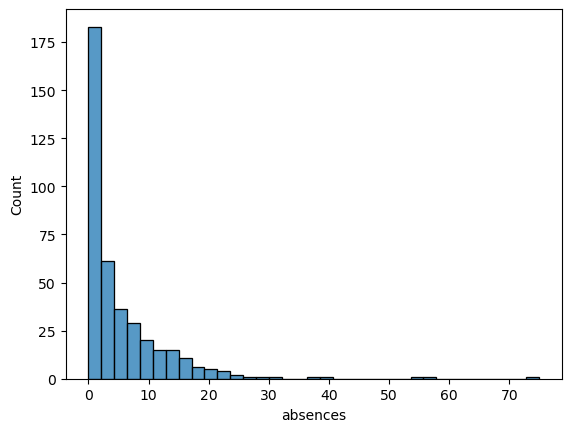

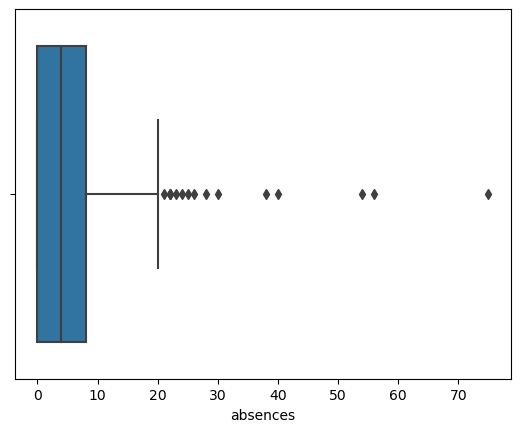

In [11]:
sns.histplot(x='absences', data=students_df)
plt.show()
plt.clf()

sns.boxplot(x='absences', data=students_df)
plt.show()
plt.close()


In [15]:
print('IQR: ', iqr(students_df.absences))
print('std: ', students_df.absences.std())
print('median: ', students_df.absences.median())
print('mean: ', students_df.absences.mean())

IQR:  8.0
std:  8.003095687108177
median:  4.0
mean:  5.708860759493671
